### Code to generate trajectories (Beta!)
#### 2021 01 20 CJH

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---
#### making trajectories by hand - neds a lot of points on the corners

In [27]:
# copy x,y,angle data from the smartdash and make a list of them
x_offset, y_offset = 1.2, 0.9
# points used to generate trajectory
plist = [(1.520012,0.910000,0.000000), (2.447216,1.374044,59.807731), (3.359672,2.612377,39.789710), 
         (5.942630,2.809398,0.000000), (6.944320,1.960623,-69.456607), 
         (7.255449,1.207945,0.000000), (8.605512,1.105526,36.654595), 
         (8.717240,2.399724,131.803625), (8.173342,2.724106,178.791021), 
         (7.302003,2.381102,-117.243430), (7.065360,1.737164,-116.747003),
         (6.497403,1.066788,-146.158568), (4.970436,0.852641,178.906396), 
         (3.005862,1.234382,136.592009), (2.316865,2.258568,131.932310),
         (1.423031,2.593755,-179.951353), (1.054474,2.660425,179.761362)]
df_slalolm = pd.DataFrame(plist, columns=['X', 'Y', 'THETA'])
df_slalolm['X_NEW'] = df_slalolm['X'] - x_offset
df_slalolm['Y_NEW'] = df_slalolm['Y'] - y_offset
df_slalolm['RAD'] = df_slalolm['THETA']*3.1415/180
df_slalolm.round(2)

,X,Y,THETA,X_NEW,Y_NEW,RAD
0,1.52,0.91,0.00,0.32,0.01,0.00
1,2.45,1.37,59.81,1.25,0.47,1.04
2,3.36,2.61,39.79,2.16,1.71,0.69
3,5.94,2.81,0.00,4.74,1.91,0.00
4,6.94,1.96,-69.46,5.74,1.06,-1.21
5,7.26,1.21,0.00,6.06,0.31,0.00
6,8.61,1.11,36.65,7.41,0.21,0.64
7,8.72,2.40,131.80,7.52,1.50,2.30
8,8.17,2.72,178.79,6.97,1.82,3.12
9,7.30,2.38,-117.24,6.10,1.48,-2.05


In [28]:
# generate translation waypoints 
x_offset, y_offset = 1.2, 0.9
out = ""
for ix, i in enumerate(zip(df_slalolm['X_NEW'],df_slalolm['Y_NEW'])):
    out = out+ f"geo.Translation2d({i[0]:2.2f}, {i[1]:2.2f}), "
    if (ix-2) % 3 == 0:
        out= out+ '\n'
print(out)

geo.Translation2d(0.32, 0.01), geo.Translation2d(1.25, 0.47), geo.Translation2d(2.16, 1.71), 
geo.Translation2d(4.74, 1.91), geo.Translation2d(5.74, 1.06), geo.Translation2d(6.06, 0.31), 
geo.Translation2d(7.41, 0.21), geo.Translation2d(7.52, 1.50), geo.Translation2d(6.97, 1.82), 
geo.Translation2d(6.10, 1.48), geo.Translation2d(5.87, 0.84), geo.Translation2d(5.30, 0.17), 
geo.Translation2d(3.77, -0.05), geo.Translation2d(1.81, 0.33), geo.Translation2d(1.12, 1.36), 
geo.Translation2d(0.22, 1.69), geo.Translation2d(-0.15, 1.76), 


In [25]:
# generate poses
# simple loop test - see that it works and help to tune constants
plist = [(1.287243,0.919311,0.000000), (7.367178,1.058972,0.000000), (8.819659,1.766591,91.521775), 
         (7.255449,2.651115,179.934763), (1.408283,2.604561,179.934763) ]
df_slalolm = pd.DataFrame(plist, columns=['X', 'Y', 'THETA'])
df_slalolm['X_NEW'] = df_slalolm['X'] - x_offset
df_slalolm['Y_NEW'] = df_slalolm['Y'] - y_offset
df_slalolm['RAD'] = df_slalolm['THETA']*3.1415/180
df_slalolm.round(2)

,X,Y,THETA,X_NEW,Y_NEW,RAD
0,1.29,0.92,0.00,0.09,0.02,0.00
1,7.37,1.06,0.00,6.17,0.16,0.00
2,8.82,1.77,91.52,7.62,0.87,1.60
3,7.26,2.65,179.93,6.06,1.75,3.14
4,1.41,2.60,179.93,0.21,1.70,3.14


In [29]:
# generate pose waypoints
out = ""
for ix, i in enumerate(zip(df_slalolm['X_NEW'],df_slalolm['Y_NEW'],df_slalolm['RAD'])):
    out = out+ f"geo.Pose2d({i[0]:2.2f}, {i[1]:2.2f}, geo.Rotation2d({i[2]:2.2f})), "
    if (ix) % 2 == 0:
        out= out+ '\n'
print(out)

geo.Pose2d(0.32, 0.01, geo.Rotation2d(0.00)), 
geo.Pose2d(1.25, 0.47, geo.Rotation2d(1.04)), geo.Pose2d(2.16, 1.71, geo.Rotation2d(0.69)), 
geo.Pose2d(4.74, 1.91, geo.Rotation2d(0.00)), geo.Pose2d(5.74, 1.06, geo.Rotation2d(-1.21)), 
geo.Pose2d(6.06, 0.31, geo.Rotation2d(0.00)), geo.Pose2d(7.41, 0.21, geo.Rotation2d(0.64)), 
geo.Pose2d(7.52, 1.50, geo.Rotation2d(2.30)), geo.Pose2d(6.97, 1.82, geo.Rotation2d(3.12)), 
geo.Pose2d(6.10, 1.48, geo.Rotation2d(-2.05)), geo.Pose2d(5.87, 0.84, geo.Rotation2d(-2.04)), 
geo.Pose2d(5.30, 0.17, geo.Rotation2d(-2.55)), geo.Pose2d(3.77, -0.05, geo.Rotation2d(3.12)), 
geo.Pose2d(1.81, 0.33, geo.Rotation2d(2.38)), geo.Pose2d(1.12, 1.36, geo.Rotation2d(2.30)), 
geo.Pose2d(0.22, 1.69, geo.Rotation2d(-3.14)), geo.Pose2d(-0.15, 1.76, geo.Rotation2d(3.14)), 



---
#### Measure the feed forward parameters to characterize the drivetrain

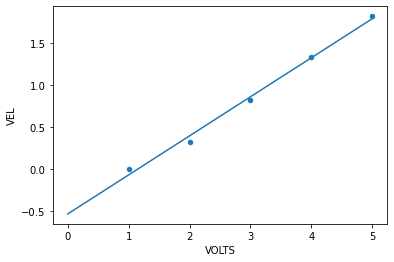

In [6]:
# feed forward - run at a fixed voltage and measure the velocity, generate the intercept and slope for the SimpleMotorFeedForward object
ff_x = [1, 2,    3,    4,    5]
ff_y = [0, 0.33, 0.83, 1.33,  1.82]

df_pid = pd.DataFrame({'VOLTS':ff_x, 'VEL':ff_y})
ax = df_pid.plot('VOLTS', 'VEL', kind='scatter')

par = np.polyfit(ff_x, ff_y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = np.linspace(0,5,51)
yl = slope*xl + intercept

plt.plot(xl,yl)

In [7]:
ks = -intercept/slope
kv = 1/slope
ks, kv

(1.1422413793103445, 2.1551724137931036)

---
#### Fitting some distance data - not necessary now that encoders are fixed

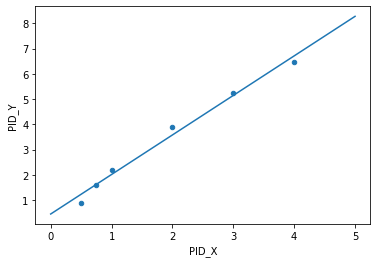

In [8]:
# this used 
pid_x = np.array([0.5,  0.75,  1,    2,    3,    4  ])
pid_y = np.array([0.88, 1.62,  2.20, 3.89, 5.25, 6.48])

df_pid = pd.DataFrame({'PID_X':pid_x, 'PID_Y':pid_y})
ax = df_pid.plot('PID_X', 'PID_Y', kind='scatter')

par = np.polyfit(pid_x, pid_y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = np.linspace(0,5,51)
yl = slope*xl + intercept

plt.plot(xl,yl)

In [9]:
example = [{'points': 50, 'time': '5:00', 'year': 2010}, 
{'points': 25, 'time': '6:00', 'month': "february"}, 
{'points':90, 'time': '9:00', 'month': 'january'}, 
{'points_h1':20, 'month': 'june'}]
pd.DataFrame(example)

,month,points,points_h1,time,year
0,NaN,50.0,NaN,5:00,2010.0
1,february,25.0,NaN,6:00,NaN
2,january,90.0,NaN,9:00,NaN
3,june,NaN,20.0,NaN,NaN


In [40]:
import numpy as np
spacing = 2.5 * .3084
slalom_points = np.array([(2,1), (2,2), (2,4), (2,5), (2,6), (2,7), (2,8), (2,10), (4,1), (4,2)], dtype=float)

In [46]:
slalom_points = spacing * slalom_points

In [47]:
test = np.array([1.5, 1.4])

In [51]:
any([np.linalg.norm(test-i)<0.3 for i in slalom_points])

True

In [44]:
test - slalom_points[1]

array([-0.5, -0.6])

In [45]:
slalom_points[1]

array([2., 2.])

In [52]:
slalom_points = [(1,2), (2,2), (4,2), (5,2), (6,2), (7,2), (8,2), (10,2), (1,4), (2,4)]
slalom_points = [(spacing*i[0], spacing*i[1]) for i in slalom_points]
slalom_points

[(0.771, 1.542),
 (1.542, 1.542),
 (3.084, 1.542),
 (3.855, 1.542),
 (4.626, 1.542),
 (5.397, 1.542),
 (6.168, 1.542),
 (7.71, 1.542),
 (0.771, 3.084),
 (1.542, 3.084)]